#**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

###**Análisis Exploratorio y Curación de Datos**

**Edición 2023**

Grupo 32: 

- Daniel Andres Dos Santos
- Luciana Gramajo
- Natalia Rubio
- Sebastián Coca

---
## Trabajo práctico entregable - Parte 1
  

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_context('talk')

from sqlalchemy import create_engine, text

In [2]:
import plotly
plotly.__version__
# To update plotly, uncomment and run the following line:
# !pip install plotly --upgrade

'5.13.1'

In [3]:
melb_df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
melb_df[:3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files
# para guardar la DB en el drive
path = '/content/drive/Shared drives/DiploDatos-G32/AEyC/dfjoin.csv'


Mounted at /content/drive


## Ejercicio 1 SQL: 

1. Crear una base de datos en SQLite utilizando la libreria [SQLalchemy](https://stackoverflow.com/questions/2268050/execute-sql-from-file-in-sqlalchemy).
https://docs.sqlalchemy.org/en/14/core/engines.html#sqlite

2. Ingestar los datos provistos en 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv' en una tabla y el dataset generado en clase con datos de airbnb y sus precios por codigo postal en otra.

3. Implementar consultas en SQL que respondan con la siguiente información:

    - cantidad de registros totales por ciudad.
    - cantidad de registros totales por barrio y ciudad.

4. Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL  para obtener un resultado similar a lo realizado con Pandas en clase.  



In [5]:
#pip install SQLAlchemy


In [6]:
#la tabla que tambien necesitamos:
interesting_cols = [
  'description', 'neighborhood_overview',
  'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price',
  'latitude', 'longitude',
]

airbnb_df = pd.read_csv('https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv', usecols=interesting_cols)

<ipython-input-6-d7c792a7df1c>:9: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb_df = pd.read_csv('https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv', usecols=interesting_cols)


In [7]:
ls


drive/  sample_data/


### 1.1 y 1.2 - creamos la DB y las dos tablas que vamos a utilizar más adelante

In [8]:
engine = create_engine('sqlite:///melb_airbnb_sqlite.db', echo=True)

#engine = create_engine('sqlite:///sysarmy.sqlite3', echo=True)


In [9]:
melb_df.to_sql('melb', con=engine, if_exists="replace")
airbnb_df.to_sql('airbnb', con=engine, if_exists="replace")

2023-06-08 12:07:56,693 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-06-08 12:07:56,712 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("melb")


INFO:sqlalchemy.engine.Engine:PRAGMA main.table_info("melb")


2023-06-08 12:07:56,727 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2023-06-08 12:07:56,737 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("melb")


INFO:sqlalchemy.engine.Engine:PRAGMA temp.table_info("melb")


2023-06-08 12:07:56,742 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2023-06-08 12:07:56,750 INFO sqlalchemy.engine.Engine ROLLBACK


INFO:sqlalchemy.engine.Engine:ROLLBACK


2023-06-08 12:07:56,756 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-06-08 12:07:56,767 INFO sqlalchemy.engine.Engine 
CREATE TABLE melb (
	"index" BIGINT, 
	"Suburb" TEXT, 
	"Address" TEXT, 
	"Rooms" BIGINT, 
	"Type" TEXT, 
	"Price" FLOAT, 
	"Method" TEXT, 
	"SellerG" TEXT, 
	"Date" TEXT, 
	"Distance" FLOAT, 
	"Postcode" FLOAT, 
	"Bedroom2" FLOAT, 
	"Bathroom" FLOAT, 
	"Car" FLOAT, 
	"Landsize" FLOAT, 
	"BuildingArea" FLOAT, 
	"YearBuilt" FLOAT, 
	"CouncilArea" TEXT, 
	"Lattitude" FLOAT, 
	"Longtitude" FLOAT, 
	"Regionname" TEXT, 
	"Propertycount" FLOAT
)




INFO:sqlalchemy.engine.Engine:
CREATE TABLE melb (
	"index" BIGINT, 
	"Suburb" TEXT, 
	"Address" TEXT, 
	"Rooms" BIGINT, 
	"Type" TEXT, 
	"Price" FLOAT, 
	"Method" TEXT, 
	"SellerG" TEXT, 
	"Date" TEXT, 
	"Distance" FLOAT, 
	"Postcode" FLOAT, 
	"Bedroom2" FLOAT, 
	"Bathroom" FLOAT, 
	"Car" FLOAT, 
	"Landsize" FLOAT, 
	"BuildingArea" FLOAT, 
	"YearBuilt" FLOAT, 
	"CouncilArea" TEXT, 
	"Lattitude" FLOAT, 
	"Longtitude" FLOAT, 
	"Regionname" TEXT, 
	"Propertycount" FLOAT
)




2023-06-08 12:07:56,782 INFO sqlalchemy.engine.Engine [no key 0.01540s] ()


INFO:sqlalchemy.engine.Engine:[no key 0.01540s] ()


2023-06-08 12:07:56,797 INFO sqlalchemy.engine.Engine CREATE INDEX ix_melb_index ON melb ("index")


INFO:sqlalchemy.engine.Engine:CREATE INDEX ix_melb_index ON melb ("index")


2023-06-08 12:07:56,801 INFO sqlalchemy.engine.Engine [no key 0.00468s] ()


INFO:sqlalchemy.engine.Engine:[no key 0.00468s] ()


2023-06-08 12:07:56,817 INFO sqlalchemy.engine.Engine COMMIT


INFO:sqlalchemy.engine.Engine:COMMIT


2023-06-08 12:07:56,906 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-06-08 12:07:57,821 INFO sqlalchemy.engine.Engine INSERT INTO melb ("index", "Suburb", "Address", "Rooms", "Type", "Price", "Method", "SellerG", "Date", "Distance", "Postcode", "Bedroom2", "Bathroom", "Car", "Landsize", "BuildingArea", "YearBuilt", "CouncilArea", "Lattitude", "Longtitude", "Regionname", "Propertycount") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)


INFO:sqlalchemy.engine.Engine:INSERT INTO melb ("index", "Suburb", "Address", "Rooms", "Type", "Price", "Method", "SellerG", "Date", "Distance", "Postcode", "Bedroom2", "Bathroom", "Car", "Landsize", "BuildingArea", "YearBuilt", "CouncilArea", "Lattitude", "Longtitude", "Regionname", "Propertycount") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)


2023-06-08 12:07:57,825 INFO sqlalchemy.engine.Engine [generated in 0.71265s] [(0, 'Abbotsford', '85 Turner St', 2, 'h', 1480000.0, 'S', 'Biggin', '3/12/2016', 2.5, 3067.0, 2.0, 1.0, 1.0, 202.0, None, None, 'Yarra', -37.7996, 144.9984, 'Northern Metropolitan', 4019.0), (1, 'Abbotsford', '25 Bloomburg St', 2, 'h', 1035000.0, 'S', 'Biggin', '4/02/2016', 2.5, 3067.0, 2.0, 1.0, 0.0, 156.0, 79.0, 1900.0, 'Yarra', -37.8079, 144.9934, 'Northern Metropolitan', 4019.0), (2, 'Abbotsford', '5 Charles St', 3, 'h', 1465000.0, 'SP', 'Biggin', '4/03/2017', 2.5, 3067.0, 3.0, 2.0, 0.0, 134.0, 150.0, 1900.0, 'Yarra', -37.8093, 144.9944, 'Northern Metropolitan', 4019.0), (3, 'Abbotsford', '40 Federation La', 3, 'h', 850000.0, 'PI', 'Biggin', '4/03/2017', 2.5, 3067.0, 3.0, 2.0, 1.0, 94.0, None, None, 'Yarra', -37.7969, 144.9969, 'Northern Metropolitan', 4019.0), (4, 'Abbotsford', '55a Park St', 4, 'h', 1600000.0, 'VB', 'Nelson', '4/06/2016', 2.5, 3067.0, 3.0, 1.0, 2.0, 120.0, 142.0, 2014.0, 'Yarra', -37.8

INFO:sqlalchemy.engine.Engine:[generated in 0.71265s] [(0, 'Abbotsford', '85 Turner St', 2, 'h', 1480000.0, 'S', 'Biggin', '3/12/2016', 2.5, 3067.0, 2.0, 1.0, 1.0, 202.0, None, None, 'Yarra', -37.7996, 144.9984, 'Northern Metropolitan', 4019.0), (1, 'Abbotsford', '25 Bloomburg St', 2, 'h', 1035000.0, 'S', 'Biggin', '4/02/2016', 2.5, 3067.0, 2.0, 1.0, 0.0, 156.0, 79.0, 1900.0, 'Yarra', -37.8079, 144.9934, 'Northern Metropolitan', 4019.0), (2, 'Abbotsford', '5 Charles St', 3, 'h', 1465000.0, 'SP', 'Biggin', '4/03/2017', 2.5, 3067.0, 3.0, 2.0, 0.0, 134.0, 150.0, 1900.0, 'Yarra', -37.8093, 144.9944, 'Northern Metropolitan', 4019.0), (3, 'Abbotsford', '40 Federation La', 3, 'h', 850000.0, 'PI', 'Biggin', '4/03/2017', 2.5, 3067.0, 3.0, 2.0, 1.0, 94.0, None, None, 'Yarra', -37.7969, 144.9969, 'Northern Metropolitan', 4019.0), (4, 'Abbotsford', '55a Park St', 4, 'h', 1600000.0, 'VB', 'Nelson', '4/06/2016', 2.5, 3067.0, 3.0, 1.0, 2.0, 120.0, 142.0, 2014.0, 'Yarra', -37.8072, 144.9941, 'Northern

2023-06-08 12:07:58,046 INFO sqlalchemy.engine.Engine COMMIT


INFO:sqlalchemy.engine.Engine:COMMIT


2023-06-08 12:07:58,127 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-06-08 12:07:58,137 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("airbnb")


INFO:sqlalchemy.engine.Engine:PRAGMA main.table_info("airbnb")


2023-06-08 12:07:58,151 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2023-06-08 12:07:58,164 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("airbnb")


INFO:sqlalchemy.engine.Engine:PRAGMA temp.table_info("airbnb")


2023-06-08 12:07:58,173 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2023-06-08 12:07:58,183 INFO sqlalchemy.engine.Engine ROLLBACK


INFO:sqlalchemy.engine.Engine:ROLLBACK


2023-06-08 12:07:58,196 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-06-08 12:07:58,207 INFO sqlalchemy.engine.Engine 
CREATE TABLE airbnb (
	"index" BIGINT, 
	description TEXT, 
	neighborhood_overview TEXT, 
	street TEXT, 
	neighborhood TEXT, 
	city TEXT, 
	suburb TEXT, 
	state TEXT, 
	zipcode TEXT, 
	latitude FLOAT, 
	longitude FLOAT, 
	price BIGINT, 
	weekly_price FLOAT, 
	monthly_price FLOAT
)




INFO:sqlalchemy.engine.Engine:
CREATE TABLE airbnb (
	"index" BIGINT, 
	description TEXT, 
	neighborhood_overview TEXT, 
	street TEXT, 
	neighborhood TEXT, 
	city TEXT, 
	suburb TEXT, 
	state TEXT, 
	zipcode TEXT, 
	latitude FLOAT, 
	longitude FLOAT, 
	price BIGINT, 
	weekly_price FLOAT, 
	monthly_price FLOAT
)




2023-06-08 12:07:58,219 INFO sqlalchemy.engine.Engine [no key 0.01146s] ()


INFO:sqlalchemy.engine.Engine:[no key 0.01146s] ()


2023-06-08 12:07:58,239 INFO sqlalchemy.engine.Engine CREATE INDEX ix_airbnb_index ON airbnb ("index")


INFO:sqlalchemy.engine.Engine:CREATE INDEX ix_airbnb_index ON airbnb ("index")


2023-06-08 12:07:58,252 INFO sqlalchemy.engine.Engine [no key 0.01237s] ()


INFO:sqlalchemy.engine.Engine:[no key 0.01237s] ()


2023-06-08 12:07:58,279 INFO sqlalchemy.engine.Engine COMMIT


INFO:sqlalchemy.engine.Engine:COMMIT


2023-06-08 12:07:58,362 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-06-08 12:07:59,185 INFO sqlalchemy.engine.Engine INSERT INTO airbnb ("index", description, neighborhood_overview, street, neighborhood, city, suburb, state, zipcode, latitude, longitude, price, weekly_price, monthly_price) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)


INFO:sqlalchemy.engine.Engine:INSERT INTO airbnb ("index", description, neighborhood_overview, street, neighborhood, city, suburb, state, zipcode, latitude, longitude, price, weekly_price, monthly_price) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)


2023-06-08 12:07:59,190 INFO sqlalchemy.engine.Engine [generated in 0.61931s] [(0, 'House: Clean, New, Modern, Quite, Safe. 10Km from the City. Golf course, Tennis courts, bus stop & shops walking distance!! Rooms: Contains one queen ... (702 characters truncated) ... pproximately what your daily in and out hours might look like.  Note: There is a 5 year old fun loving dog who lives with us and is part of our famil', 'Very safe! Family oriented. Older age group.', 'Bulleen, VIC, Australia', 'Balwyn North', 'Manningham', 'Bulleen', 'VIC', '3105', -37.77268393, 145.0921328, 60, None, None), (1, "A large air conditioned room with queen spring mattress bed in a vintage apartment. Located right outside is a tram to the city just 19 minutes away. ... (702 characters truncated) ... ou east to Bundoora and west to Pacoevale. The Lygon Street tram line that goes past Melbourne University is 10 minutes walk west and Sydney Road and", "This hip area is a crossroads between two great cultural stri

INFO:sqlalchemy.engine.Engine:[generated in 0.61931s] [(0, 'House: Clean, New, Modern, Quite, Safe. 10Km from the City. Golf course, Tennis courts, bus stop & shops walking distance!! Rooms: Contains one queen ... (702 characters truncated) ... pproximately what your daily in and out hours might look like.  Note: There is a 5 year old fun loving dog who lives with us and is part of our famil', 'Very safe! Family oriented. Older age group.', 'Bulleen, VIC, Australia', 'Balwyn North', 'Manningham', 'Bulleen', 'VIC', '3105', -37.77268393, 145.0921328, 60, None, None), (1, "A large air conditioned room with queen spring mattress bed in a vintage apartment. Located right outside is a tram to the city just 19 minutes away. ... (702 characters truncated) ... ou east to Bundoora and west to Pacoevale. The Lygon Street tram line that goes past Melbourne University is 10 minutes walk west and Sydney Road and", "This hip area is a crossroads between two great cultural strips of inner Northern Mel

2023-06-08 12:07:59,568 INFO sqlalchemy.engine.Engine COMMIT


INFO:sqlalchemy.engine.Engine:COMMIT


22895

In [10]:
#files.download('melb_airbnb_sqlite.db') #para guardarlo!! y poder abrirlo con sqlite

In [11]:
print(melb_df['Lattitude'].isin(airbnb_df['latitude']).mean()*100) 
print(melb_df['Longtitude'].isin(airbnb_df['longitude']).mean()*100) 
#En virtud del alto porcentaje los tomo por homólogos
print(melb_df['Suburb'].isin(airbnb_df['suburb']).mean()*100) #99% de representación de melb_df en airbnb_df
print(melb_df['CouncilArea'].isin(airbnb_df['city']).mean()*100) #90% de representación


0.1251840942562592
0.7584683357879234
99.08689248895435
89.85272459499264


### 1.3- Como bajamos la DB se exploró el archivo con las dos tablas antes de hacer el query

In [12]:
#Implementar consultas en SQL que respondan con la siguiente información:
#cantidad de registros totales por ciudad.

query1melb = """
SELECT CouncilArea, COUNT(*)
FROM melb
GROUP BY CouncilArea
"""
query1airbnb = """
SELECT city, COUNT(*)
FROM airbnb
GROUP BY city
"""

#cantidad de registros totales por barrio y ciudad.

query2melb = """
SELECT Suburb, CouncilArea, COUNT(*) 
FROM melb 
GROUP BY Suburb, CouncilArea
"""
query2airbnb = """
SELECT city, suburb, COUNT(*) 
FROM airbnb 
GROUP BY suburb, city
"""

In [13]:
with engine.connect() as con:
    rs = con.execute(text(query2melb))
    df_bc_melb = pd.DataFrame(rs.fetchall(), columns=rs.keys())
    for row in rs:
        print(row)

print(rs)
with engine.connect() as con:
    rs2 = con.execute(text(query2airbnb))
    df_bc_airbnb = pd.DataFrame(rs2.fetchall(), columns=rs2.keys())


df_barrio_ciudad = pd.concat([df_bc_melb, df_bc_airbnb], axis=1)


2023-06-08 12:07:59,800 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-06-08 12:07:59,804 INFO sqlalchemy.engine.Engine 
SELECT Suburb, CouncilArea, COUNT(*) 
FROM melb 
GROUP BY Suburb, CouncilArea



INFO:sqlalchemy.engine.Engine:
SELECT Suburb, CouncilArea, COUNT(*) 
FROM melb 
GROUP BY Suburb, CouncilArea



2023-06-08 12:07:59,811 INFO sqlalchemy.engine.Engine [generated in 0.01115s] ()


INFO:sqlalchemy.engine.Engine:[generated in 0.01115s] ()


2023-06-08 12:07:59,838 INFO sqlalchemy.engine.Engine ROLLBACK


INFO:sqlalchemy.engine.Engine:ROLLBACK


2023-06-08 12:07:59,844 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-06-08 12:07:59,852 INFO sqlalchemy.engine.Engine 
SELECT city, suburb, COUNT(*) 
FROM airbnb 
GROUP BY suburb, city



INFO:sqlalchemy.engine.Engine:
SELECT city, suburb, COUNT(*) 
FROM airbnb 
GROUP BY suburb, city



2023-06-08 12:07:59,860 INFO sqlalchemy.engine.Engine [generated in 0.01601s] ()


INFO:sqlalchemy.engine.Engine:[generated in 0.01601s] ()


2023-06-08 12:08:00,026 INFO sqlalchemy.engine.Engine ROLLBACK


INFO:sqlalchemy.engine.Engine:ROLLBACK


In [14]:
df_barrio_ciudad #no queda muy bien, ya que hay muchas filas que no estan en una de las tablas... entonces en la otra da NAN

,Suburb,CouncilArea,COUNT(*),city,suburb,COUNT(*)
0,Abbotsford,None,1.0,Boroondara,None,1
1,Abbotsford,Yarra,55.0,Darebin,None,1
2,Aberfeldie,None,4.0,Frankston,None,1
3,Aberfeldie,Moonee Valley,40.0,Glen Eira,None,1
4,Airport West,None,6.0,Maribyrnong,None,1
...,...,...,...,...,...,...
687,NaN,NaN,NaN,Glen Eira,墨尔本,1
688,NaN,NaN,NaN,Manningham,墨尔本,3
689,NaN,NaN,NaN,Wyndham,墨尔本,1
690,NaN,NaN,NaN,Melbourne,墨爾本 Melbourne,1


In [15]:
#df_bc_melb.shape
#df_bc_airbnb.shape
df_barrio_ciudad.shape


(692, 6)

### 1.4- Ahora, para: Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL para obtener un resultado similar a lo realizado con Pandas en clase.

Osea, sobre la estimación de precios de ventas de propiedades en Melbourne, Australia

Entonces, para combinar las tablas vamos a necesitar algo en común, que es el código postal ('zipcode' en airbnb y 'Postcode' en melb)

In [16]:
airbnb_df.columns

Index(['description', 'neighborhood_overview', 'street', 'neighborhood',
       'city', 'suburb', 'state', 'zipcode', 'latitude', 'longitude', 'price',
       'weekly_price', 'monthly_price'],
      dtype='object')

In [17]:
airbnb_df.zipcode.value_counts()[:5] 

3000.0    2491
3000       876
3006.0     860
3182.0     579
3182       556
Name: zipcode, dtype: int64

In [18]:
airbnb_df['zipcode'] = pd.to_numeric(airbnb_df.zipcode, errors='coerce')

In [19]:
airbnb_df.zipcode.value_counts()

3000.0     3367
3006.0     1268
3182.0     1135
3141.0      881
3004.0      728
           ... 
3785.0        1
3096.0        1
30122.0       1
3912.0        1
4068.0        1
Name: zipcode, Length: 247, dtype: int64

In [20]:
melb_df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [21]:
melb_df.Postcode.value_counts() #este lo tiene bien!

3073.0    359
3020.0    306
3121.0    292
3040.0    290
3046.0    284
         ... 
3340.0      1
3158.0      1
3808.0      1
3777.0      1
3793.0      1
Name: Postcode, Length: 198, dtype: int64

In [22]:
#me fijo que tienen en común
intersection = np.intersect1d(
    airbnb_df.zipcode.values, melb_df.Postcode.values, assume_unique=False)
print("airbnb unique zipcodes", len(airbnb_df.zipcode.unique()))
print("melb unique zipcodes", len(melb_df.Postcode.unique()))
print("Common zipcodes", len(intersection))

airbnb unique zipcodes 248
melb unique zipcodes 198
Common zipcodes 191


In [23]:
new_columns=['zipcode', 'price','weekly_price', 'monthly_price'] # las elegimos de a cuerdo a lo que vimos en clases

airbnb_price_by_zc = airbnb_df[new_columns].groupby('zipcode')\
  .agg({'price': ['mean', 'count'], 'weekly_price': 'mean',
        'monthly_price': 'mean'})\
  .reset_index()

airbnb_price_by_zc.columns


MultiIndex([(      'zipcode',      ''),
            (        'price',  'mean'),
            (        'price', 'count'),
            ( 'weekly_price',  'mean'),
            ('monthly_price',  'mean')],
           )

In [24]:
airbnb_price_by_zc.columns

MultiIndex([(      'zipcode',      ''),
            (        'price',  'mean'),
            (        'price', 'count'),
            ( 'weekly_price',  'mean'),
            ('monthly_price',  'mean')],
           )

In [25]:
# Flatten the two level columns
airbnb_price_by_zc.columns = [
  ' '.join(col).strip()
  for col in airbnb_price_by_zc.columns.values]
# le cambiamos de nombre de nuevo a las columnas
airbnb_price_by_zc = airbnb_price_by_zc.rename(
    columns={'price mean': 'airbnb price mean',
             'price count': 'airbnb record count',
             'weekly_price mean': 'airbnb weekly price_mean',
             'monthly_price mean': 'airbnb monthly price mean'}
)

airbnb_price_by_zc 

,zipcode,airbnb price mean,airbnb record count,airbnb weekly price_mean,airbnb monthly price mean
0,2010.0,40.000000,1,NaN,NaN
1,2134.0,50.000000,1,NaN,NaN
2,2582.0,104.000000,1,NaN,NaN
3,3000.0,150.504307,3367,918.738956,3407.204651
4,3001.0,132.500000,2,NaN,NaN
...,...,...,...,...,...
242,7367.0,230.000000,1,NaN,NaN
243,8938.0,296.000000,1,NaN,NaN
244,9004.0,226.000000,1,NaN,NaN
245,9540.0,245.000000,1,NaN,NaN


In [26]:
#Ahora hacemos el merge de las tablas, para ello utilizo la tabla en el enigne donde estaba melb y airbnb

airbnb_price_by_zc.to_sql('propiedades_airbnb_zip', con=engine, if_exists="replace")
queryjoin = """
SELECT *
FROM melb  
LEFT JOIN propiedades_airbnb_zip
ON melb.Postcode = propiedades_airbnb_zip.zipcode
"""
with engine.connect() as con:
      rs = con.execute(text(queryjoin))
      dfjoin_rs = pd.DataFrame(rs.fetchall())
      # print(query1)
      for row in rs:
          print(row)
dfjoin_rs.head()


2023-06-08 12:08:00,486 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-06-08 12:08:00,508 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("propiedades_airbnb_zip")


INFO:sqlalchemy.engine.Engine:PRAGMA main.table_info("propiedades_airbnb_zip")


2023-06-08 12:08:00,520 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2023-06-08 12:08:00,526 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("propiedades_airbnb_zip")


INFO:sqlalchemy.engine.Engine:PRAGMA temp.table_info("propiedades_airbnb_zip")


2023-06-08 12:08:00,534 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2023-06-08 12:08:00,546 INFO sqlalchemy.engine.Engine ROLLBACK


INFO:sqlalchemy.engine.Engine:ROLLBACK


2023-06-08 12:08:00,549 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-06-08 12:08:00,559 INFO sqlalchemy.engine.Engine 
CREATE TABLE propiedades_airbnb_zip (
	"index" BIGINT, 
	zipcode FLOAT, 
	"airbnb price mean" FLOAT, 
	"airbnb record count" BIGINT, 
	"airbnb weekly price_mean" FLOAT, 
	"airbnb monthly price mean" FLOAT
)




INFO:sqlalchemy.engine.Engine:
CREATE TABLE propiedades_airbnb_zip (
	"index" BIGINT, 
	zipcode FLOAT, 
	"airbnb price mean" FLOAT, 
	"airbnb record count" BIGINT, 
	"airbnb weekly price_mean" FLOAT, 
	"airbnb monthly price mean" FLOAT
)




2023-06-08 12:08:00,568 INFO sqlalchemy.engine.Engine [no key 0.00853s] ()


INFO:sqlalchemy.engine.Engine:[no key 0.00853s] ()


2023-06-08 12:08:00,593 INFO sqlalchemy.engine.Engine CREATE INDEX ix_propiedades_airbnb_zip_index ON propiedades_airbnb_zip ("index")


INFO:sqlalchemy.engine.Engine:CREATE INDEX ix_propiedades_airbnb_zip_index ON propiedades_airbnb_zip ("index")


2023-06-08 12:08:00,595 INFO sqlalchemy.engine.Engine [no key 0.00208s] ()


INFO:sqlalchemy.engine.Engine:[no key 0.00208s] ()


2023-06-08 12:08:00,609 INFO sqlalchemy.engine.Engine COMMIT


INFO:sqlalchemy.engine.Engine:COMMIT


2023-06-08 12:08:00,614 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-06-08 12:08:00,623 INFO sqlalchemy.engine.Engine INSERT INTO propiedades_airbnb_zip ("index", zipcode, "airbnb price mean", "airbnb record count", "airbnb weekly price_mean", "airbnb monthly price mean") VALUES (?, ?, ?, ?, ?, ?)


INFO:sqlalchemy.engine.Engine:INSERT INTO propiedades_airbnb_zip ("index", zipcode, "airbnb price mean", "airbnb record count", "airbnb weekly price_mean", "airbnb monthly price mean") VALUES (?, ?, ?, ?, ?, ?)


2023-06-08 12:08:00,629 INFO sqlalchemy.engine.Engine [generated in 0.00870s] [(0, 2010.0, 40.0, 1, None, None), (1, 2134.0, 50.0, 1, None, None), (2, 2582.0, 104.0, 1, None, None), (3, 3000.0, 150.5043065043065, 3367, 918.7389558232932, 3407.204651162791), (4, 3001.0, 132.5, 2, None, None), (5, 3002.0, 200.9796954314721, 197, 956.3793103448276, 3712.714285714286), (6, 3003.0, 130.20599250936328, 267, 760.2, 2629.5), (7, 3004.0, 158.27197802197801, 728, 1061.1714285714286, 3759.925925925926)  ... displaying 10 of 247 total bound parameter sets ...  (245, 9540.0, 245.0, 1, None, None), (246, 30122.0, 75.0, 1, 525.0, 2281.0)]


INFO:sqlalchemy.engine.Engine:[generated in 0.00870s] [(0, 2010.0, 40.0, 1, None, None), (1, 2134.0, 50.0, 1, None, None), (2, 2582.0, 104.0, 1, None, None), (3, 3000.0, 150.5043065043065, 3367, 918.7389558232932, 3407.204651162791), (4, 3001.0, 132.5, 2, None, None), (5, 3002.0, 200.9796954314721, 197, 956.3793103448276, 3712.714285714286), (6, 3003.0, 130.20599250936328, 267, 760.2, 2629.5), (7, 3004.0, 158.27197802197801, 728, 1061.1714285714286, 3759.925925925926)  ... displaying 10 of 247 total bound parameter sets ...  (245, 9540.0, 245.0, 1, None, None), (246, 30122.0, 75.0, 1, 525.0, 2281.0)]


2023-06-08 12:08:00,636 INFO sqlalchemy.engine.Engine COMMIT


INFO:sqlalchemy.engine.Engine:COMMIT


2023-06-08 12:08:00,656 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2023-06-08 12:08:00,658 INFO sqlalchemy.engine.Engine 
SELECT *
FROM melb  
LEFT JOIN propiedades_airbnb_zip
ON melb.Postcode = propiedades_airbnb_zip.zipcode



INFO:sqlalchemy.engine.Engine:
SELECT *
FROM melb  
LEFT JOIN propiedades_airbnb_zip
ON melb.Postcode = propiedades_airbnb_zip.zipcode



2023-06-08 12:08:00,660 INFO sqlalchemy.engine.Engine [generated in 0.00408s] ()


INFO:sqlalchemy.engine.Engine:[generated in 0.00408s] ()


2023-06-08 12:08:01,031 INFO sqlalchemy.engine.Engine ROLLBACK


INFO:sqlalchemy.engine.Engine:ROLLBACK


,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Lattitude,Longtitude,Regionname,Propertycount,index,zipcode,airbnb price mean,airbnb record count,airbnb weekly price_mean,airbnb monthly price mean
0,0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,-37.7996,144.9984,Northern Metropolitan,4019.0,57.0,3067.0,130.624031,258.0,605.152174,2187.032258
1,1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,-37.8079,144.9934,Northern Metropolitan,4019.0,57.0,3067.0,130.624031,258.0,605.152174,2187.032258
2,2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,-37.8093,144.9944,Northern Metropolitan,4019.0,57.0,3067.0,130.624031,258.0,605.152174,2187.032258
3,3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,...,-37.7969,144.9969,Northern Metropolitan,4019.0,57.0,3067.0,130.624031,258.0,605.152174,2187.032258
4,4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,...,-37.8072,144.9941,Northern Metropolitan,4019.0,57.0,3067.0,130.624031,258.0,605.152174,2187.032258


## Ejercicio 2 - Pandas: 

1. Seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad. Justificar las columnas seleccionadas y las que no lo fueron.
 - Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

 
2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.

In [27]:
### 

### 2.1 - Para predecir el valor de la propiedad, tenemos que elegir ciertas columnas, y  para esto tenemos que tener en cuenta que hay diferentes tipos de variables (como se estudió también en el practico anterior):
**Variables categóricas**: no se pueden medir numéricamente (por ejemplo: nacionalidad, color de la piel, sexo). Y estas se pueden dividir en Ordinales y Nominales. 

**Variables cuantitativas**: tienen valor numérico (edad, precio de un producto, ingresos anuales). Y estas se pueden dividir en Discretas y Contínuas.

Entonces, exploramos el dataset


In [28]:
melb_df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [29]:
melb_df.describe()
print ()

In [30]:
melb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

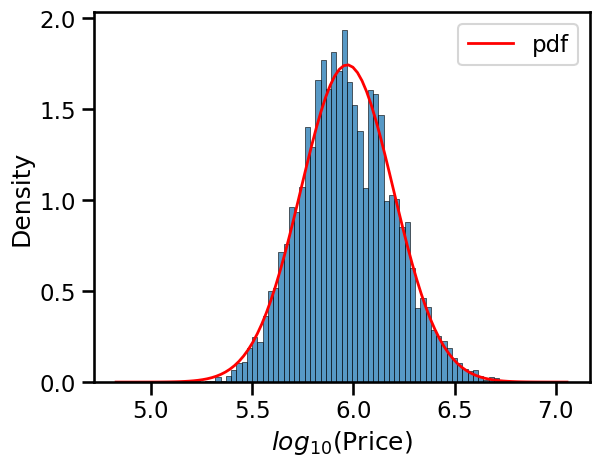

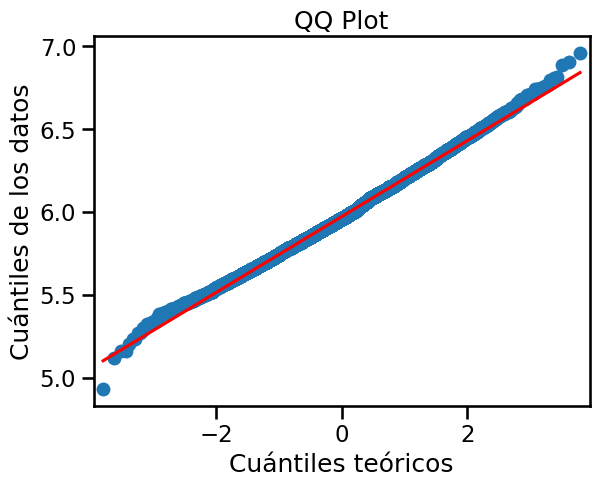

In [31]:
from scipy import stats
import statsmodels.api as sm

mu, std = stats.norm.fit(np.log10(melb_df.Price.dropna()))
ax = sns.histplot(data=np.log10(melb_df.Price.dropna()), kde=False, stat="density" )#, log_scale=True, kde=False)

# calculate the pdf
x0, x1 = ax.get_xlim()  # extract the endpoints for the x-axis
x_pdf = np.linspace(x0, x1, 100)
y_pdf = stats.norm.pdf(x_pdf, mu, std)

ax.plot(x_pdf, y_pdf, 'r', lw=2, label='pdf')                                                   
ax.legend()
plt.xlabel("$log_{10}$(Price)")

#sns.histplot(melb_df.Price.dropna(), log_scale=True, kde=True)
#sns.displot(melb_df.Price.dropna(), log_scale=True, kde=True)
#plt.ticklabel_format(style='plain', axis='x')

#plt.show()
#mu, std

# Crea el gráfico QQ
# Para confirmar que la distribución acampanada es la normal y no otra distribución émula de la misma
sm.qqplot(np.log10(melb_df.Price.dropna()), line='s')

# Configura el título y las etiquetas de los ejes
plt.title("QQ Plot")
plt.xlabel("Cuántiles teóricos")
plt.ylabel("Cuántiles de los datos")

# Muestra el gráfico
plt.show()

### EXPLORAMOS LAS VARIABLES

Para esta parte del práctico decidimos utilizar la ultima tabla que creamos con el join. Entonces, para realizar la exploración y determinar cuales son las columnas que queremos recorremos de forma cualitativa el contenido de la tabla previamente articulada (i.e. **dfjoin\_rs**), averiguamos sobre el significado de las variables y recorremos las características de su distribucipón. Luego, seleccionamos las variables numéricas más correlacionadas con *Price* calculando coeficiente de Pearson $r$. De forma análoga, para las variables categóricas calculamos el $estadístico~F$. Este estadístico adquiere mayor magnitud cuando la variabilidad intergrupal (o sea entre los niveles de la variable categórica) incrementa, y al mismo tiempo, la variabilidad intragrupal disminuye. El resultado global de esta experiencia puede ser enunciado como sigue: 

```
El precio puede ser descripto satisfactoriamente 
con AÑO DE CONSTRUCCIÓN de la vivienda, 
NRO DE ESPACIOS que posee, 
la REGIÓN donde se emplaza y 
el TIPO de casa.  
```


In [32]:
 dfjoin_rs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      13580 non-null  int64  
 1   Suburb                     13580 non-null  object 
 2   Address                    13580 non-null  object 
 3   Rooms                      13580 non-null  int64  
 4   Type                       13580 non-null  object 
 5   Price                      13580 non-null  float64
 6   Method                     13580 non-null  object 
 7   SellerG                    13580 non-null  object 
 8   Date                       13580 non-null  object 
 9   Distance                   13580 non-null  float64
 10  Postcode                   13580 non-null  float64
 11  Bedroom2                   13580 non-null  float64
 12  Bathroom                   13580 non-null  float64
 13  Car                        13518 non-null  flo

Averiguamos las variables en información del dataset (https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot) 
Se marcan con negrillas las conceptuadas como relevantes.

**Rooms: Number of rooms**

Price: Price in dollars

Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

**Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.**

SellerG: Real Estate Agent

**YearBuilt: Year of building dating back hundreds of years in some cases**

Distance: Distance from CBD The Melbourne central business district 

**Regionname: General Region (West, North West, North, North east …etc)**

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size

BuildingArea: Building Size

CouncilArea: Governing council for the area

### **Para un mejor análisis dividimos las columnas en los dos grupos, de acuerdo al tipo de variable, y elegimos las columnas de cada una:**

  * Variables cuantitativas o numéricas: a partir de la matríz de correlación filtrada por el precio (manteniendo los que tiene hasta 1 decimal), vemos que los que mejor correlacionan son 'Rooms', 'YearBuilt'. Deacuedo a ese criterio también se podría incluir a Bedroom2 y Bathroom, sin embrago estas correlacionan con Rooms, por lo cual no nos daría ninguna información reelevante extra.

  * Variables categóricas: las elegimos a partir de F estadístico, y las que nos quedaron son 'Type' y 'Regionname'.


index                       -0.054534
Rooms                        0.496634
Price                        1.000000
Distance                    -0.162522
Postcode                     0.107867
Bedroom2                     0.475951
Bathroom                     0.467038
Car                          0.238979
Landsize                     0.037507
BuildingArea                 0.090981
YearBuilt                   -0.323617
Lattitude                   -0.212934
Longtitude                   0.203656
Propertycount               -0.042153
index                        0.221408
zipcode                      0.110992
airbnb price mean            0.199149
airbnb record count         -0.043774
airbnb weekly price_mean     0.223097
airbnb monthly price mean    0.221397
Name: Price, dtype: float64
                              index     Rooms     Price  Distance  Postcode  \
index                      1.000000  0.102389 -0.054534  0.291658  0.094312   
Rooms                      0.102389  1.000000  0.49663

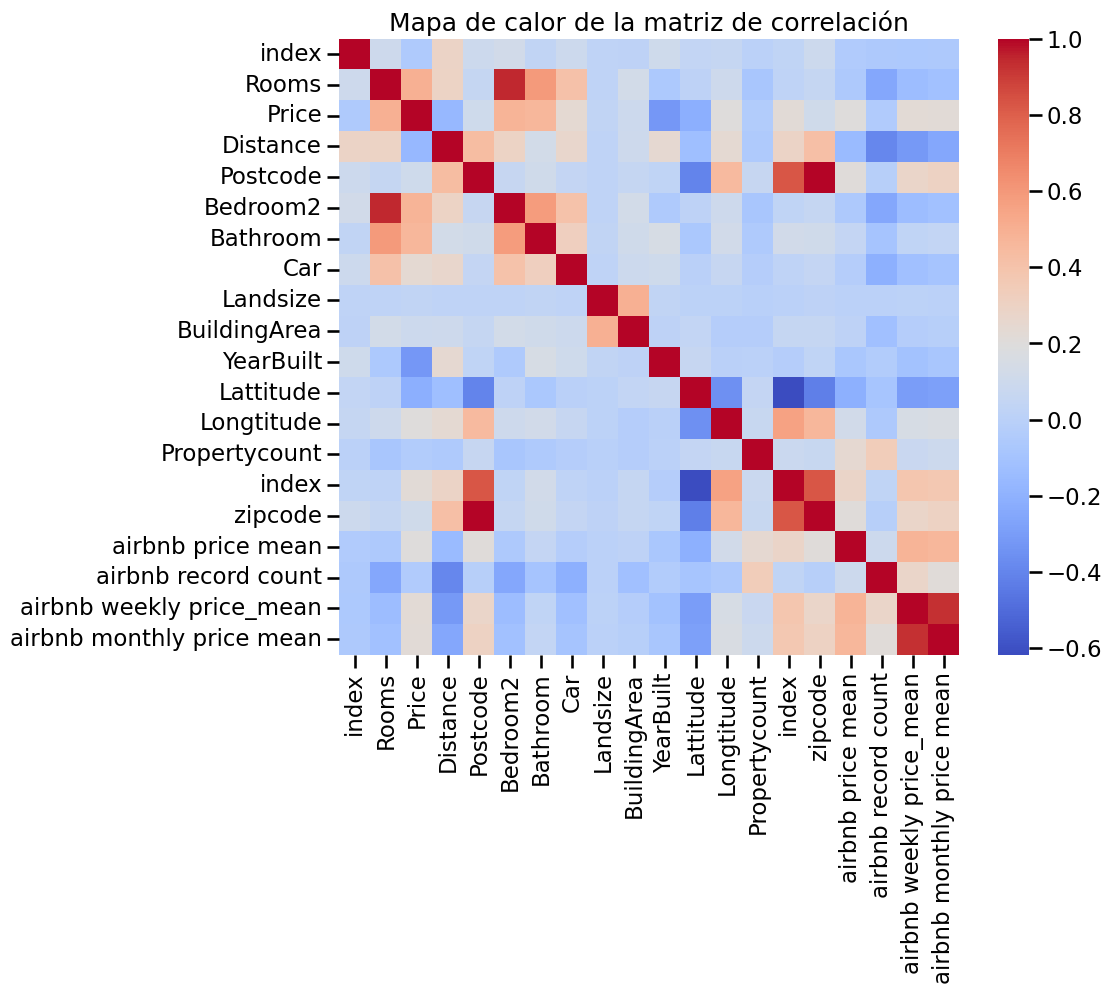

In [33]:
numeric_variables = dfjoin_rs.select_dtypes(include='number')  # Selecionamos solo variables numéricas
# Calculamos la matriz de correlación 
correlation_matrix = numeric_variables.corr()
# Filtramos la matriz para la columna "Price"
price_correlation = correlation_matrix['Price']
# Desplegamos los resultados
print(price_correlation)
#Mostramos todas las correlaciones para ver las relaciones entre explicativas
print(correlation_matrix)

# Crea el mapa de calor
plt.figure(figsize=(10, 8))  # Ajusta el tamaño de la figura según tus necesidades
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')

# Configura el título
plt.title("Mapa de calor de la matriz de correlación")

#plt.savefig('correlacion.png', format='png', transparent=False)"
plt.savefig('correlacion.pdf')
#files.download('correlacion.pdf')


# Muestra el mapa de calor
plt.show()


In [34]:
from scipy.stats import f_oneway

categorical_variables = dfjoin_rs.select_dtypes(include='object')  # Seleccionar solo vbles categoricas

for columna in categorical_variables.columns:
    groups = dfjoin_rs.groupby(columna)['Price'].apply(list)
    f_statistic, p_value = f_oneway(*groups)
    print(f"Variable: {columna}")
    print(f"F-statistic: {f_statistic}")
    print(f"P-value: {p_value}")
    print()

#familiarizándonos con datos en mano. Veo los distintos valores de las siguientes vbles
print(dfjoin_rs['Type'].value_counts())
print(dfjoin_rs['Rooms'].value_counts())

Variable: Suburb
F-statistic: 19.32830870108239
P-value: 0.0

Variable: Address
F-statistic: 2.333867556541435
P-value: 6.858338243958666e-14

Variable: Type
F-statistic: 1409.0051533559567
P-value: 0.0

Variable: Method
F-statistic: 42.819148803624735
P-value: 9.392065939264317e-36

Variable: SellerG
F-statistic: 14.78387272913062
P-value: 0.0

Variable: Date
F-statistic: 6.480732809318034
P-value: 1.5980452262502264e-46

Variable: CouncilArea
F-statistic: 97.15941677473333
P-value: 0.0

Variable: Regionname
F-statistic: 284.40018651008097
P-value: 0.0

h    9449
u    3017
t    1114
Name: Type, dtype: int64
3     5881
2     3648
4     2688
1      681
5      596
6       67
7       10
8        8
10       1
Name: Rooms, dtype: int64


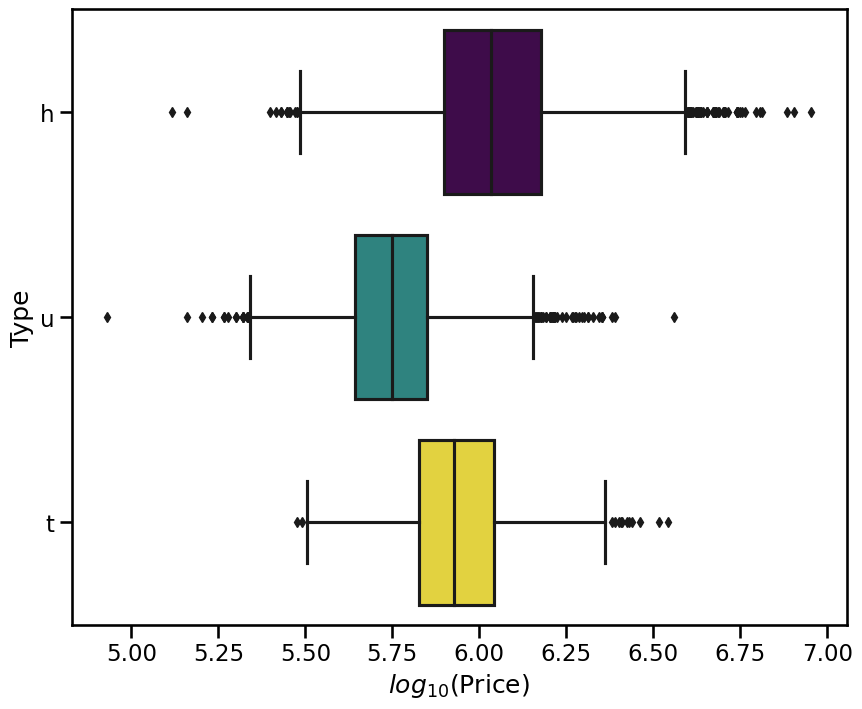

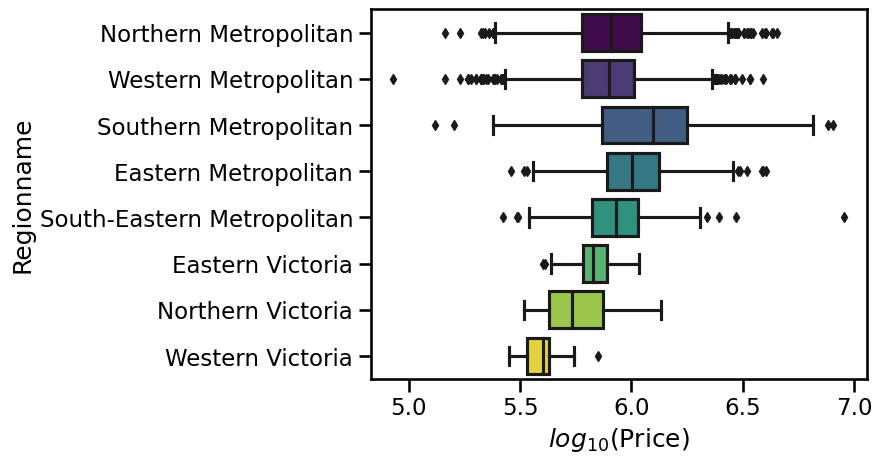

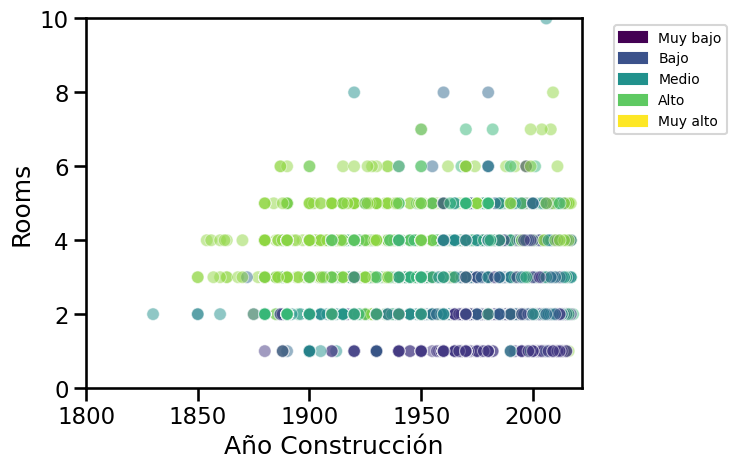

In [35]:
import matplotlib.patches as mpatches
import numpy as np


# Configuro tamaño de figura
plt.figure(figsize=(10, 8))

#paleta de colores y asignación a categorías
cmap = plt.get_cmap('viridis')
names = dfjoin_rs['Type'].unique()
colors = cmap(np.linspace(0, 1, len(names)))
clr = {names[i]: colors[i] for i in range(len(names))}

#Boxplot por tipo de vivienda
sns.boxplot(x = np.log10(dfjoin_rs['Price']), y = dfjoin_rs['Type'],  palette= clr)
plt.xlabel('$log_{10}$(Price)')
plt.savefig('box1.pdf')
plt.show()

#ahora boxplot por región
names = dfjoin_rs['Regionname'].unique()
colors = cmap(np.linspace(0, 1, len(names)))
clr = {names[i]: colors[i] for i in range(len(names))}
sns.boxplot(x = np.log10(dfjoin_rs['Price']), y = dfjoin_rs['Regionname'],  palette= clr)
plt.xlabel('$log_{10}$(Price)')
plt.savefig('box2.pdf')
plt.show()


fig, ax = plt.subplots()
names = ['Muy bajo', 'Bajo', 'Medio','Alto', 'Muy alto']
colors = cmap(np.linspace(0, 1, len(names)))
clr = {names[i]: colors[i] for i in range(len(names))}
#corte por cuantiles, o sea, formo intervalos de valores de precios para que queden con igual frecuencia
quantilecut = pd.qcut(dfjoin_rs['Price'], 5, labels= names)

#scatter = ax.scatter(x = dfjoin_rs['YearBuilt'], y = dfjoin_rs['Rooms'], s=dfjoin_rs['SQRT_Price'], c=dfjoin_rs['Regionname'].map(clr), alpha=0.5)
sns.scatterplot(x=dfjoin_rs['YearBuilt'], y=dfjoin_rs['Rooms'], hue=quantilecut, palette='viridis', alpha = 0.5)

# Create legend for color
legend_patches = [mpatches.Patch(color=colors[i], label=names[i]) for i in range(len(names))]

# Ajusto la posición de la leyenda y la anclo por afuera
plt.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 10})
#Muestro la ventana temporal de los últimos años hasta 1800
plt.xlim([1800, 2022])
plt.ylim([0, 10])

plt.xlabel('Año Construcción')
plt.ylabel('Rooms')
plt.savefig('Scatt1.pdf')
plt.show()

Entonces, de acuerdo a lo que analizamos antes, nos queda el archivo: dfjoin_rs_new, con las columnas seleccionadas que son potencialmente informativas para predecir el precio. Decidimos mantener también las columnas provenientes de airbnb además de la columna 'BuildingArea' que la vamos a necesitar en la parte 2 del práctico. A los efectos de preservar la información geográfica, se decide conservar el dato de coordenadas geográficas para los registros.  

In [36]:
dfjoin_rs.columns #listamos los nombres de las columnas para tener bien presentes la nomenclatura


Index(['index', 'Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method',
       'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom',
       'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea',
       'Lattitude', 'Longtitude', 'Regionname', 'Propertycount', 'index',
       'zipcode', 'airbnb price mean', 'airbnb record count',
       'airbnb weekly price_mean', 'airbnb monthly price mean'],
      dtype='object')

In [37]:
dfjoin_rs_new = dfjoin_rs.copy()
# creamos una lista llamada columns_to_drop que contiene los nombres de las columnas que deseas eliminar. 
# Luego, utilizamos el método drop en el DataFrame dfjoin_rs_new pasando la lista de columnas a eliminar mediante el argumento columns. 
# El parámetro inplace=True indica que los cambios deben realizarse directamente en el DataFrame original. 
# El parámetro axis=1 especifica que las columnas deben eliminarse.
columns_to_drop = ['Suburb', 'Address', 'Method', 'SellerG', 'Date', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'CouncilArea', 'Propertycount']
dfjoin_rs_new.drop(columns_to_drop, inplace=True, axis=1)


In [38]:
dfjoin_rs_new.columns

Index(['index', 'Rooms', 'Type', 'Price', 'Postcode', 'BuildingArea',
       'YearBuilt', 'Lattitude', 'Longtitude', 'Regionname', 'index',
       'zipcode', 'airbnb price mean', 'airbnb record count',
       'airbnb weekly price_mean', 'airbnb monthly price mean'],
      dtype='object')

Procedemos a escrutar la estrucutra de datos para remover valores extremos que no sean relevantes en el estudio de los valores de las propiedades

Text(0.5, 0, '$log_{10}$(Price)')

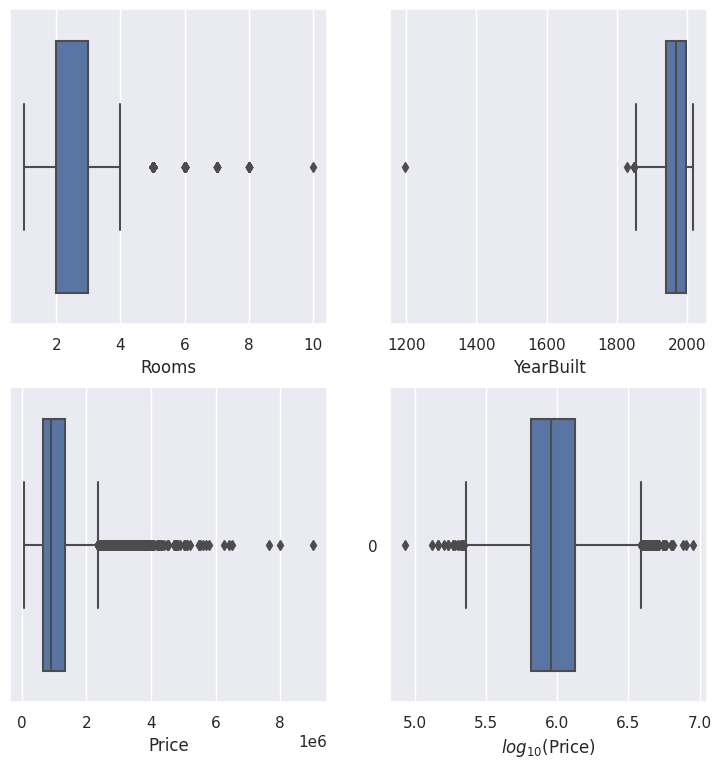

In [39]:
# Definimos area de 4 subplots (3 x 2)
sns.set()
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9,9))

# Creamos 1 boxplot en cada subplot
axes[0,0].set_title('')
sns.boxplot(data=dfjoin_rs_new, x='Rooms', ax=axes[0,0])

axes[0,1].set_title('')
sns.boxplot(data=dfjoin_rs_new, x='YearBuilt', ax=axes[0,1])

axes[1,0].set_title('')
sns.boxplot(data=dfjoin_rs_new, x='Price', ax=axes[1,0])

logprecios = np.log10(dfjoin_rs_new['Price'])

# Crea el boxplot con los valores logarítmicos
sns.boxplot(data=logprecios, orient='h', ax=axes[1,1])
plt.xlabel("$log_{10}$(Price)")



(1800.0, 2000.0)

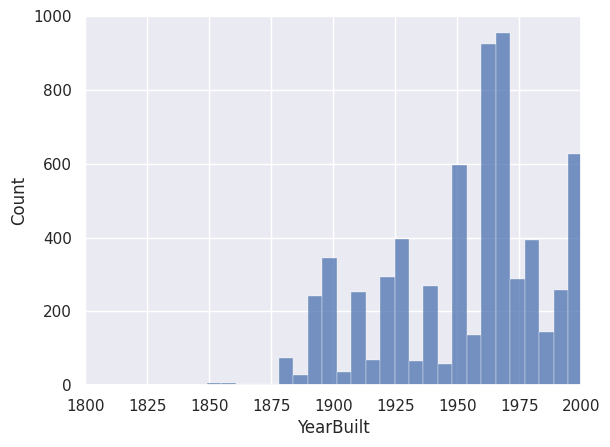

In [40]:
sns.histplot(dfjoin_rs_new.YearBuilt.dropna())
plt.xlim(1800, 2000)


In [41]:
#Para uniformizar criterio de corte, eliminamos registros que exceden el 1.5*IQR para 
#estas variables: Rooms, YearBuilt y logprecios
#Agrego columna de los valores logarítmicamente transformados
dfjoin_rs_new['Price_log'] = np.log10(dfjoin_rs_new['Price'])
# Calcula los límites superiores e inferiores
Q1 = dfjoin_rs_new[['Rooms', 'YearBuilt', 'Price_log']].quantile(0.25)
Q3 = dfjoin_rs_new[['Rooms', 'YearBuilt', 'Price_log']].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtra las observaciones que no exceden los límites
dfjoin_rs_new = dfjoin_rs_new[~((dfjoin_rs_new[['Rooms', 'YearBuilt', 'Price_log']] < lower_bound) |
                                (dfjoin_rs_new[['Rooms', 'YearBuilt', 'Price_log']] > upper_bound)).any(axis=1)]

# Muestra el DataFrame resultante sin outliers
print(dfjoin_rs_new)
dfjoin_rs_new.info()



       index  Rooms Type      Price  Postcode  BuildingArea  YearBuilt  \
0          0      2    h  1480000.0    3067.0           NaN        NaN   
1          1      2    h  1035000.0    3067.0          79.0     1900.0   
2          2      3    h  1465000.0    3067.0         150.0     1900.0   
3          3      3    h   850000.0    3067.0           NaN        NaN   
4          4      4    h  1600000.0    3067.0         142.0     2014.0   
...      ...    ...  ...        ...       ...           ...        ...   
13575  13575      4    h  1245000.0    3150.0           NaN     1981.0   
13576  13576      3    h  1031000.0    3016.0         133.0     1995.0   
13577  13577      3    h  1170000.0    3016.0           NaN     1997.0   
13578  13578      4    h  2500000.0    3016.0         157.0     1920.0   
13579  13579      4    h  1285000.0    3013.0         112.0     1920.0   

       Lattitude  Longtitude                  Regionname  index  zipcode  \
0      -37.79960   144.99840       

In [42]:

#cortamos la muestra de acuerdo a lo analizado anteriormente:
#dfjoin_rs_new = dfjoin_rs_new[dfjoin_rs_new['Rooms'] <= 4]
#dfjoin_rs_new = dfjoin_rs_new[dfjoin_rs_new['YearBuilt'] > 1875]

#dfjoin_rs_new.info()

### 2.3 Otra variable que nos pueden servir para combinar los datos, pueden se los Suburbios ('Suburb' en melb, y 'suburb' en airbnb). Otra variables que podría sernos útil para combinar los datos es la asociado a la posición: latitud y longitud ('Lattitude' y 'Longtitude' en melb y 'latitude' y 'longitude' en airbnb).


In [43]:
melb_suburbs = melb_df.Suburb.dropna().unique().tolist()
airbnb_suburbs = airbnb_df.suburb.dropna().unique().tolist()
intersection = list(set(melb_suburbs).intersection(airbnb_suburbs))
print("Airbnb unique suburbs", len(airbnb_suburbs))
print("Sales unique suburbs", len(melb_suburbs))
print("Common suburbs", len(intersection))

Airbnb unique suburbs 542
Sales unique suburbs 314
Common suburbs 296


de esta variable se podría utilizar ya que presentan bastantes datos en común

In [44]:
melb_long = melb_df.Longtitude.dropna().unique().tolist()
airbnb_long = airbnb_df.longitude.dropna().unique().tolist()
intersection = list(set(melb_long).intersection(airbnb_long))
print("Airbnb unique longitude", len(airbnb_long))
print("Sales unique longitude", len(melb_long))
print("Common longitude", len(intersection))

Airbnb unique longitude 22700
Sales unique longitude 7063
Common longitude 43


In [45]:
melb_lat = melb_df.Lattitude.dropna().unique().tolist()
airbnb_lat = airbnb_df.latitude.dropna().unique().tolist()
intersection = list(set(melb_lat).intersection(airbnb_lat))
print("Airbnb unique latitude", len(airbnb_lat))
print("Sales unique latitude", len(melb_lat))
print("Common latitude", len(intersection))

Airbnb unique latitude 22874
Sales unique latitude 6503
Common latitude 5


In [46]:
melb_df.info()
#airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

aunque son muy pocos los datos en común que presentan, lo graficamos a ver si se podría agrupar de alguna manera, la distancia entre ellos es bastante en algunos casos, por lo que no parece una buena elección este parámetro por si mismo.

In [47]:
import plotly.express as px
import pandas as pd

data = melb_df.sample(300)
data2 = melb_df.sample(300)

# Agregar una columna 'color' con valor constante 'blue' a data
data['color'] = 'melb'

# Agregar una columna 'color' con valor constante 'red' a data2
data2['color'] = 'airbnb'

combined_data = pd.concat([data, data2], ignore_index=True)

fig = px.scatter_geo(
    combined_data, lat='Lattitude', lon='Longtitude', color='color'
)
fig.update_traces(marker=dict(size=5))
fig.update_geos(fitbounds="locations")

# Agregar leyendas personalizadas
fig.add_trace(
    dict(type='scattergeo', lat=[None], lon=[None], marker=dict(color='blue'), name='Melb')
)
fig.add_trace(
    dict(type='scattergeo', lat=[None], lon=[None], marker=dict(color='red'), name='Airbnb')
)

fig.show()

## Ejercicio 3:

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

In [48]:
# guardamos en el drive el DB
with open(path, 'w') as f:
  dfjoin_rs_new.to_csv(f, index=False)